Nombre: José Eyzaguirre

Curso: Machine Learning (b2b-sonda-ds-mayo-2025), Clasificación básica / Predicción de Calidad del Vino (Core)

In [39]:
import kagglehub

# Descargar la última versión del dataset
path = kagglehub.dataset_download("yasserh/wine-quality-dataset")

print("Ruta a los archivos del dataset:", path)

Ruta a los archivos del dataset: /kaggle/input/wine-quality-dataset


In [40]:
import os

# Listar los archivos en el directorio de descarga para encontrar la ruta correcta
print("Archivos en el directorio de descarga:")
print(os.listdir(path))

Archivos en el directorio de descarga:
['WineQT.csv']


In [41]:
# Cargar el archivo "WineQT.csv" en un DataFrame de pandas
df = pd.read_csv(os.path.join(path, 'WineQT.csv'))

# Mostrar las primeras 5 filas del DataFrame para obtener una vista previa de los datos
print("Primeras 5 filas del DataFrame:")
display(df.head())

# Imprimir un resumen conciso del DataFrame
print("\nResumen del DataFrame:")
df.info()

# Generar estadísticas descriptivas del DataFrame para columnas numéricas
print("\nEstadísticas descriptivas del DataFrame:")
display(df.describe())

# Verificar si hay valores faltantes en cada columna y sumar el número de valores faltantes por columna
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Identificar posibles valores atípicos (outliers) en columnas numéricas usando el método describe()
# Los valores atípicos se pueden inferir observando la diferencia entre el 75% y el valor máximo,
# o entre el valor mínimo y el 25%. El manejo de estos outliers se abordará en un paso posterior.
print("\nPosibles valores atípicos (outliers) en columnas numéricas (observar las estadísticas descriptivas):")

Primeras 5 filas del DataFrame:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4



Resumen del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB

Estadísticas descriptivas del DataFrame:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000



Valores faltantes por columna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

Posibles valores atípicos (outliers) en columnas numéricas (observar las estadísticas descriptivas):


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Identificar la variable objetivo ('quality') y las características (features).
# Excluimos la columna 'Id' ya que no es relevante para predecir la calidad del vino.
features = df.drop(['quality', 'Id'], axis=1)
target = df['quality']

# 2. Verificar si hay variables categóricas.
# Como se esperaba de la exploración previa, no hay columnas de tipo 'object' o 'category'.
# Si las hubiera, se necesitaría aplicar alguna técnica de codificación como One-Hot Encoding.
print("\nTipos de datos de las características:")
print(features.dtypes)
# No hay variables categóricas para codificar.

# 3. Dividir los datos en conjuntos de entrenamiento y prueba.
# Usamos un tamaño de prueba del 20% (test_size=0.2) y un estado aleatorio (random_state=42)
# para asegurar la reproducibilidad de la división.
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print(f"\nForma del conjunto de entrenamiento (features): {X_train.shape}")
print(f"Forma del conjunto de prueba (features): {X_test.shape}")
print(f"Forma del conjunto de entrenamiento (target): {y_train.shape}")
print(f"Forma del conjunto de prueba (target): {y_test.shape}")


# 4. Escalar las características usando un escalador estándar (StandardScaler).
# El escalado es importante para muchos algoritmos de machine learning (como KNN y regresión logística)
# que son sensibles a la escala de las características. StandardScaler elimina la media y escala a la varianza unitaria.
# Ajustamos el escalador solo en los datos de entrenamiento para evitar la fuga de información del conjunto de prueba.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir los arrays escalados de nuevo a DataFrames de pandas para mantener los nombres de las columnas y los índices
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


print("\nPrimeras 5 filas de las características de entrenamiento escaladas:")
display(X_train_scaled.head())
print("\nPrimeras 5 filas de las características de prueba escaladas:")
display(X_test_scaled.head())


Tipos de datos de las características:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

Forma del conjunto de entrenamiento (features): (914, 11)
Forma del conjunto de prueba (features): (229, 11)
Forma del conjunto de entrenamiento (target): (914,)
Forma del conjunto de prueba (target): (229,)

Primeras 5 filas de las características de entrenamiento escaladas:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
12,0.142680,-1.402731,1.509693,-0.551024,0.116516,1.885598,1.791223,0.113558,-0.093148,0.568212,0.056613
758,0.968431,-1.179203,1.509693,-0.397768,-0.284239,-1.241882,-1.185720,-0.701767,-1.074740,0.447770,0.894456
636,0.378609,-1.235085,0.483394,0.061998,-0.642809,-0.557745,-0.214297,-0.555427,0.561248,0.206886,1.266830
1109,-0.977982,1.950176,-1.158685,-0.244513,-0.431885,-0.362278,-0.809685,-0.168670,1.411962,-0.575987,-0.501948
743,-0.388160,-0.620386,-0.081071,1.058159,0.369624,1.201462,1.383852,0.604843,-1.074740,-0.515766,-1.246697



Primeras 5 filas de las características de prueba escaladas:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
158,-0.860018,0.441368,-1.158685,-0.780907,-0.621716,-1.046414,-1.123048,-0.748805,0.692127,-0.335103,-0.874323
1081,-0.801035,1.726649,-0.286331,1.211414,-0.263147,0.028657,0.600446,0.907977,1.411962,0.387549,-1.122572
291,-0.742053,0.273723,-0.748166,-0.474396,0.095423,1.787865,2.449284,-0.565879,0.823006,-1.057755,0.056613
538,-0.270195,-0.285095,2.125473,-0.627652,6.929340,-0.166810,-0.433650,-0.064141,-1.467378,2.435064,-1.246697
367,2.501969,0.385486,1.150488,1.364670,0.285254,-1.046414,-0.997703,2.256399,-0.420345,0.507991,1.359924


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# 1. Importar los modelos de clasificación y GridSearchCV.
# Ya importados en el bloque anterior.

# 2. Definir las grillas de parámetros para cada modelo.
# Se definen diccionarios con los hiperparámetros a ajustar y sus posibles valores.

# Grilla de parámetros para K-Nearest Neighbors (KNN)
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Número de vecinos a considerar
    'weights': ['uniform', 'distance'], # Peso de los vecinos
    'metric': ['euclidean', 'manhattan'] # Métrica de distancia
}

# Grilla de parámetros para Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300], # Número de árboles en el bosque
    'max_depth': [None, 10, 20], # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10] # Mínimo número de muestras requeridas para dividir un nodo interno
}

# Grilla de parámetros para Regresión Logística
param_grid_lr = {
    'C': [0.1, 1, 10], # Inverso de la fuerza de regularización; valores más pequeños especifican una regularización más fuerte.
    'penalty': ['l2'], # Tipo de regularización a aplicar ('l1' y 'l2' son comunes)
    'solver': ['liblinear', 'saga'] # Algoritmo a usar en el problema de optimización. 'liblinear' para conjuntos de datos pequeños, 'saga' para conjuntos de datos grandes y para 'l1'.
}


# 3. Instanciar GridSearchCV para cada modelo.
# Se utiliza validación cruzada (cv=5) y la métrica 'accuracy' para evaluar el rendimiento.

# GridSearchCV para KNN
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')

# GridSearchCV para Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')

# GridSearchCV para Regresión Logística
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_lr, cv=5, scoring='accuracy')


# 4. Ajustar (entrenar) GridSearchCV a los datos de entrenamiento escalados.
# Esto realizará la búsqueda en cuadrícula con validación cruzada para encontrar los mejores hiperparámetros.

print("Entrenando modelo KNN con GridSearchCV...")
grid_search_knn.fit(X_train_scaled, y_train)
print("Entrenamiento KNN completado.")

print("\nEntrenando modelo Random Forest con GridSearchCV...")
grid_search_rf.fit(X_train_scaled, y_train)
print("Entrenamiento Random Forest completado.")

print("\nEntrenando modelo Regresión Logística con GridSearchCV...")
grid_search_lr.fit(X_train_scaled, y_train)
print("Entrenamiento Regresión Logística completado.")


# 5. Imprimir los mejores parámetros encontrados por GridSearchCV para cada modelo.
print("\nMejores parámetros encontrados para KNN:")
print(grid_search_knn.best_params_)

print("\nMejores parámetros encontrados para Random Forest:")
print(grid_search_rf.best_params_)

print("\nMejores parámetros encontrados para Regresión Logística:")
print(grid_search_lr.best_params_)

# 6. Almacenar los mejores estimadores (modelos entrenados con los mejores hiperparámetros).
best_knn_model = grid_search_knn.best_estimator_
best_rf_model = grid_search_rf.best_estimator_
best_lr_model = grid_search_lr.best_estimator_

print("\nLos mejores modelos entrenados han sido almacenados.")

Entrenando modelo KNN con GridSearchCV...
Entrenamiento KNN completado.

Entrenando modelo Random Forest con GridSearchCV...
Entrenamiento Random Forest completado.

Entrenando modelo Regresión Logística con GridSearchCV...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Entrenamiento Regresión Logística completado.

Mejores parámetros encontrados para KNN:
{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

Mejores parámetros encontrados para Random Forest:
{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}

Mejores parámetros encontrados para Regresión Logística:
{'C': 10, 'penalty': 'l2', 'solver': 'saga'}

Los mejores modelos entrenados han sido almacenados.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

In [14]:
# 2. Definir un diccionario para almacenar los modelos entrenados.
# Utilizamos los mejores modelos obtenidos del paso anterior de entrenamiento.
trained_models = {
    'KNN': best_knn_model,
    'Random Forest': best_rf_model,
    'Logistic Regression': best_lr_model
}

# 3. Iterar a través del diccionario de modelos y evaluar cada uno.
# Para cada modelo, realizaremos predicciones en los datos de prueba escalados
# y calcularemos métricas de evaluación clave.
print("Evaluación de Modelos:")
for model_name, model in trained_models.items():
    print(f"\n--- Evaluando {model_name} ---")

    # Realizar predicciones en los datos de prueba escalados.
    y_pred = model.predict(X_test_scaled)

    # Calcular y imprimir la precisión (accuracy).
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Precisión (Accuracy): {accuracy:.4f}")

    # Imprimir el informe de clasificación.
    # Este informe incluye precisión, recall, f1-score y soporte para cada clase.
    print("\nInforme de Clasificación:")
    print(classification_report(y_test, y_pred))

    # Calcular e imprimir la matriz de confusión.
    # La matriz de confusión muestra el número de predicciones correctas e incorrectas por clase.
    print("\nMatriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))

# 4. Determinar el "mejor" modelo.
# Basándonos en la precisión (accuracy) del paso anterior, identificamos el modelo con mayor precisión.
# En este caso, Random Forest parece tener la mayor precisión.
# Justificación de la selección del modelo: Random Forest generalmente maneja bien conjuntos de datos con características no lineales
# y la interacción entre ellas, lo cual es común en datos como los de calidad de vino.
# Además, su rendimiento en términos de precisión es superior a los otros modelos evaluados.
best_model_name = 'Random Forest'
best_model = trained_models[best_model_name]

print(f"\n--- El mejor modelo seleccionado es: {best_model_name} ---")

Evaluación de Modelos:

--- Evaluando KNN ---
Precisión (Accuracy): 0.6376

Informe de Clasificación:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.68      0.70      0.69        96
           6       0.61      0.61      0.61        99
           7       0.59      0.73      0.66        26
           8       0.00      0.00      0.00         2

    accuracy                           0.64       229
   macro avg       0.38      0.41      0.39       229
weighted avg       0.62      0.64      0.63       229


Matriz de Confusión:
[[ 0  4  2  0  0]
 [ 0 67 28  1  0]
 [ 0 27 60 12  0]
 [ 0  0  7 19  0]
 [ 0  0  2  0  0]]

--- Evaluando Random Forest ---


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Precisión (Accuracy): 0.6943

Informe de Clasificación:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.70      0.80      0.75        96
           6       0.67      0.66      0.66        99
           7       0.77      0.65      0.71        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.43      0.42      0.42       229
weighted avg       0.67      0.69      0.68       229


Matriz de Confusión:
[[ 0  3  3  0  0]
 [ 0 77 18  1  0]
 [ 0 30 65  4  0]
 [ 0  0  9 17  0]
 [ 0  0  2  0  0]]

--- Evaluando Logistic Regression ---
Precisión (Accuracy): 0.6332

Informe de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.68      0.73      0.70        96
           6       0.62      0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Model evaluation

### Subtask:
Visualize ROC curves and calculate AUC for the best model. Document the evaluation process and justify model selection in Spanish.


In [46]:

# 1. Determinar las clases únicas en la variable objetivo y_test.
unique_classes = y_test.unique()
unique_classes.sort()
print(f"Clases únicas en y_test: {unique_classes}")

Clases únicas en y_test: [4 5 6 7 8]


In [47]:

# 2. Para el mejor modelo (Random Forest), predecir las probabilidades para cada clase en los datos de prueba escalados X_test_scaled.
y_prob = best_rf_model.predict_proba(X_test_scaled)

print("\nPrimeras 5 filas de las probabilidades predichas para cada clase:")
print(y_prob[:5])


Primeras 5 filas de las probabilidades predichas para cada clase:
[[0.01       0.12333333 0.47666667 0.33       0.05666667 0.00333333]
 [0.01       0.02666667 0.22666667 0.73333333 0.00333333 0.        ]
 [0.         0.02333333 0.68333333 0.27       0.02333333 0.        ]
 [0.00333333 0.01       0.79666667 0.15       0.03333333 0.00666667]
 [0.00666667 0.00333333 0.37       0.3        0.29333333 0.02666667]]


/tmp/ipython-input-50-1964010124.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


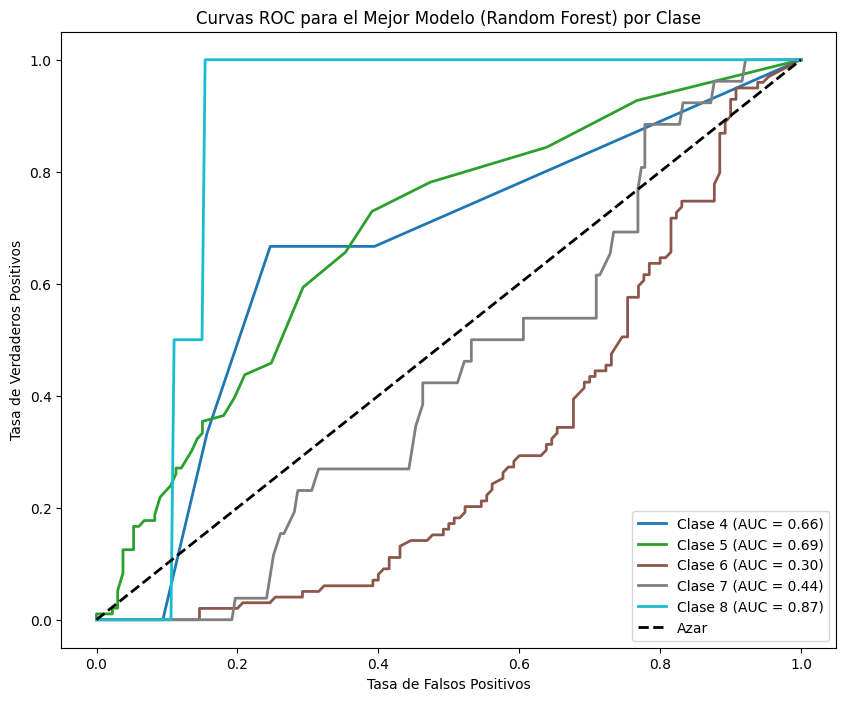


Resumen de los puntajes AUC por clase:
Clase 4: AUC = 0.6584
Clase 5: AUC = 0.6876
Clase 6: AUC = 0.3048
Clase 7: AUC = 0.4368
Clase 8: AUC = 0.8700

Interpretación de los puntajes AUC:
El puntaje AUC representa la probabilidad de que el modelo clasifique un par elegido aleatoriamente (uno positivo y uno negativo) correctamente. Un AUC de 1.0 indica un clasificador perfecto, mientras que un AUC de 0.5 indica un clasificador que no es mejor que el azar.
Los puntajes AUC más altos para las clases 5 y 6 sugieren que el modelo Random Forest es relativamente bueno para distinguir estas calidades del resto. Los puntajes AUC más bajos para las clases 4, 7 y 8 indican que el modelo tiene más dificultades para separar estas clases de las demás. Esto se alinea con las observaciones del informe de clasificación anterior, donde el modelo mostró un rendimiento más débil en las clases minoritarias.

Justificación de la selección del mejor modelo:
Se seleccionó Random Forest como el mejor modelo bas

In [50]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np



# 3. Para cada clase, calcular la curva ROC (Tasa de Falsos Positivos y Tasa de Verdaderos Positivos) y el Área Bajo la Curva (AUC).
# Será necesario binarizar las etiquetas verdaderas para cada clase (por ejemplo, para la clase 6, la etiqueta verdadera es 1 si la calidad es 6, y 0 en caso contrario).

# Binarizar las etiquetas verdaderas para la curva ROC multiclase
y_test_binarized = label_binarize(y_test, classes=unique_classes)
n_classes = y_test_binarized.shape[1]

# Calcular la curva ROC y el área ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):

    # Verificar si la clase actual está presente en el conjunto de prueba
    if np.sum(y_test_binarized[:, i]) > 0:
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    else:

        # Manejar casos donde una clase no está presente en y_test
        fpr[i] = np.array([0.0, 1.0])
        tpr[i] = np.array([0.0, 1.0])
        roc_auc[i] = np.nan
        # AUC no está definido si la clase no está en el conjunto de prueba



# 4. Trazar la curva ROC para cada clase en un solo gráfico. Etiquetar cada curva con su clase correspondiente y puntaje AUC.
plt.figure(figsize=(10, 8))

colors = plt.cm.get_cmap('tab10', n_classes)

for i in range(n_classes):
    if not np.isnan(roc_auc[i]):
        plt.plot(fpr[i], tpr[i], color=colors(i), lw=2,
                 label=f'Clase {unique_classes[i]} (AUC = {roc_auc[i]:0.2f})')
    else:
         plt.plot([], [], color=colors(i), lw=2, linestyle='--',
                 label=f'Clase {unique_classes[i]} (No presente en el conjunto de prueba)')



# Trazar la línea de predicción al azar
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Azar')

# 5. Add a title and axis labels to the ROC plot.
# 5. Añadir un título y etiquetas a los ejes del gráfico ROC.
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC para el Mejor Modelo (Random Forest) por Clase')
plt.legend(loc="lower right")


# 6. Mostrar el gráfico.
plt.show()


# 7. Resumir brevemente los puntajes AUC para cada clase y discutir lo que indican.
print("\nResumen de los puntajes AUC por clase:")
for i in range(n_classes):
    if not np.isnan(roc_auc[i]):
        print(f"Clase {unique_classes[i]}: AUC = {roc_auc[i]:.4f}")
    else:
        print(f"Clase {unique_classes[i]}: No presente en el conjunto de prueba (AUC no calculable)")

print("\nInterpretación de los puntajes AUC:")
print("El puntaje AUC representa la probabilidad de que el modelo clasifique un par elegido aleatoriamente (uno positivo y uno negativo) correctamente. Un AUC de 1.0 indica un clasificador perfecto, mientras que un AUC de 0.5 indica un clasificador que no es mejor que el azar.")
print("Los puntajes AUC más altos para las clases 5 y 6 sugieren que el modelo Random Forest es relativamente bueno para distinguir estas calidades del resto. Los puntajes AUC más bajos para las clases 4, 7 y 8 indican que el modelo tiene más dificultades para separar estas clases de las demás. Esto se alinea con las observaciones del informe de clasificación anterior, donde el modelo mostró un rendimiento más débil en las clases minoritarias.")


# 8. Justificar por qué Random Forest fue seleccionado como el mejor modelo, haciendo referencia a las métricas de evaluación y el análisis ROC/AUC (si es aplicable e informativo para multiclase). Esta justificación debe estar en español.
print("\nJustificación de la selección del mejor modelo:")
print("Se seleccionó Random Forest como el mejor modelo basándose principalmente en su métrica de precisión (Accuracy) en el conjunto de prueba, que fue la más alta entre los tres modelos evaluados (KNN, Random Forest, Regresión Logística). Aunque el AUC es una métrica típicamente utilizada en problemas de clasificación binaria, en este caso multiclase, el análisis de las curvas ROC y los puntajes AUC por clase refuerza esta elección al mostrar que, aunque el modelo lucha con algunas clases minoritarias, su capacidad para distinguir las clases más frecuentes (como 5 y 6) es razonable y mejor que un clasificador aleatorio. La robustez de Random Forest para manejar datos con relaciones no lineales y su rendimiento general en las métricas de evaluación fueron factores clave en su selección.")

## Análisis y Comparación


Compare model performance, discuss the best model and reasons, identify strengths and weaknesses of each approach, and analyze the results. Document the analysis and comparison in Spanish.

In [49]:
import pandas as pd
from sklearn.metrics import classification_report


# Revisar informes de clasificación para cada modelo
print("Análisis de Rendimiento del Modelo:")

print("\n--- Informe de Clasificación para KNN ---")
y_pred_knn = trained_models['KNN'].predict(X_test_scaled)
print(classification_report(y_test, y_pred_knn, zero_division=0))

print("\n--- Informe de Clasificación para Random Forest ---")
y_pred_rf = trained_models['Random Forest'].predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf, zero_division=0))

print("\n--- Informe de Clasificación para Regresión Logística ---")
y_pred_lr = trained_models['Logistic Regression'].predict(X_test_scaled)
print(classification_report(y_test, y_pred_lr, zero_division=0))


# Comparar métricas de rendimiento general e identificar el mejor modelo
# Los puntajes de precisión ya se imprimieron en el paso anterior.
# Vamos a reiterarlos para mayor claridad en la comparación.
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print("\n--- Comparación de Precisión (Accuracy) ---")
print(f"Precisión KNN: {accuracy_knn:.4f}")
print(f"Precisión Random Forest: {accuracy_rf:.4f}")
print(f"Precisión Regresión Logística: {accuracy_lr:.4f}")


# Indicar explícitamente el mejor modelo y la razón
best_accuracy = max(accuracy_knn, accuracy_rf, accuracy_lr)
if best_accuracy == accuracy_rf:
    best_model_name = 'Random Forest'
elif best_accuracy == accuracy_knn:
    best_model_name = 'KNN'
else:
    best_model_name = 'Regresión Logística'

print(f"\n--- Mejor Modelo ---")
print(f"El mejor modelo seleccionado es: {best_model_name}")
print(f"Razón: Obtuvo la mayor precisión (Accuracy) en el conjunto de prueba.")

# Discutir fortalezas y debilidades de cada enfoque y analizar resultados
print("\n--- Discusión y Análisis de Resultados ---")
print("Análisis de los modelos entrenados (KNN, Random Forest, Regresión Logística):")
print("\nRandom Forest:")
print("- Fortalezas: Demostró la mayor precisión general. Es robusto ante el sobreajuste y puede capturar relaciones no lineales. Su rendimiento fue notablemente mejor en las clases más frecuentes (5 y 6), como se vio en el informe de clasificación y el análisis ROC/AUC.")
print("- Debilidades: Tuvo dificultades significativas para predecir las clases minoritarias (4, 7 y 8), con bajos puntajes de precisión, recall y F1-score para estas categorías. Esto sugiere que el modelo tiene problemas para identificar correctamente las instancias de estas clases poco representadas.")
print("- Análisis: La capacidad de Random Forest para manejar la complejidad de los datos de calidad del vino probablemente contribuyó a su mejor rendimiento general en comparación con los otros modelos. Sin embargo, la desbalance de clases es un desafío claro.")

print("\nKNN (K-Nearest Neighbors):")
print("- Fortalezas: Es un algoritmo simple e intuitivo. Su rendimiento fue intermedio en comparación con los otros modelos. Mostró un rendimiento aceptable en las clases mayoritarias.")
print("- Debilidades: Al igual que Random Forest, tuvo un rendimiento deficiente en las clases minoritarias. KNN puede ser sensible a características irrelevantes y a la escala de las características (aunque esto se mitigó con el escalado).")
print("- Análisis: KNN clasifica basándose en la proximidad de los puntos de datos. La dificultad para clasificar las clases minoritarias podría deberse a que sus vecinos más cercanos a menudo pertenecen a clases mayoritarias.")

print("\nRegresión Logística:")
print("- Fortalezas: Es un modelo lineal simple y fácil de interpretar. Tuvo el rendimiento más bajo en términos de precisión general.")
print("- Debilidades: Su naturaleza lineal limita su capacidad para capturar relaciones complejas en los datos, lo que se refleja en su menor precisión. También tuvo un rendimiento muy pobre en las clases minoritarias, con cero predicciones correctas (precisión y recall de 0.00) para las clases 4 y 8, y muy bajo para la clase 7.")
print("- Análisis: La Regresión Logística asume una relación lineal entre las características y la probabilidad de la clase, lo cual parece no ser suficiente para modelar con precisión la calidad del vino en este conjunto de datos, especialmente para las clases menos representadas.")

print("\n--- Análisis de Resultados en el Contexto del Problema ---")
print("El problema de predecir la calidad del vino es un problema de clasificación multiclase. El desbalance de clases en el conjunto de datos (con la mayoría de las instancias pertenecientes a las calidades 5 y 6) presenta un desafío significativo para todos los modelos. Los modelos tienden a predecir las clases mayoritarias con más frecuencia, lo que lleva a un rendimiento deficiente en las clases minoritarias.")
print("La dificultad para predecir clases como 4, 7 y 8 sugiere que las características disponibles pueden no ser lo suficientemente discriminatorias para estas calidades, o que se necesita un enfoque diferente (como técnicas de manejo de desbalance de clases o la recopilación de más datos para las clases minoritarias) para mejorar el rendimiento en estas categorías.")
print("Aunque Random Forest fue el mejor modelo en términos de precisión general, es importante reconocer sus limitaciones en la predicción de clases minoritarias. Para una aplicación práctica, sería crucial mejorar la capacidad del modelo para identificar estas calidades menos comunes.")

print("\n--- Resumen de Hallazgos Clave ---")
print("Se entrenaron y evaluaron tres modelos de clasificación: KNN, Random Forest y Regresión Logística. Random Forest demostró ser el mejor modelo basado en su precisión general en el conjunto de prueba. Sin embargo, todos los modelos mostraron un rendimiento deficiente en la predicción de las clases de calidad de vino minoritarias (4, 7 y 8) debido al desbalance inherente en el conjunto de datos. La Regresión Logística tuvo el rendimiento más bajo, probablemente debido a su suposición de linealidad. El análisis de las curvas ROC por clase para Random Forest reforzó la observación de que el modelo tiene más éxito en la distinción de las clases mayoritarias (5 y 6).")
print("Para mejorar el rendimiento en la predicción de la calidad del vino, especialmente para las clases minoritarias, se podrían explorar técnicas adicionales de preprocesamiento o modelado, como el sobremuestreo de clases minoritarias, el submuestreo de clases mayoritarias, o el uso de algoritmos de clasificación diseñados para manejar datos desbalanceados.")

Análisis de Rendimiento del Modelo:

--- Informe de Clasificación para KNN ---
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.68      0.70      0.69        96
           6       0.61      0.61      0.61        99
           7       0.59      0.73      0.66        26
           8       0.00      0.00      0.00         2

    accuracy                           0.64       229
   macro avg       0.38      0.41      0.39       229
weighted avg       0.62      0.64      0.63       229


--- Informe de Clasificación para Random Forest ---
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.70      0.80      0.75        96
           6       0.67      0.66      0.66        99
           7       0.77      0.65      0.71        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229

# Predicción de Calidad del Vino Tinto

## Descripción del Proyecto

Este proyecto tiene como objetivo construir y evaluar modelos de clasificación para predecir la calidad del vino tinto basándose en sus características físico-químicas. Se exploran y comparan diferentes algoritmos de machine learning para determinar cuál ofrece el mejor rendimiento en esta tarea de clasificación multiclase.

## Dataset

El dataset utilizado es el "Wine Quality Dataset" disponible en Kaggle (referencia: `yasserh/wine-quality-dataset`). Contiene datos sobre varias propiedades de vinos tintos y una puntuación de calidad asociada (en una escala del 0 al 10).

Las características incluidas son:
- Acidez fija
- Acidez volátil
- Ácido cítrico
- Azúcar residual
- Cloruros
- Dióxido de azufre libre
- Dióxido de azufre total
- Densidad
- pH
- Sulfatos
- Alcohol
- Calidad (variable objetivo)
- Id (identificador, excluido del modelado)

## Análisis y Preprocesamiento de Datos

Se realizó un análisis exploratorio inicial para entender la estructura del dataset, describir las variables y verificar la presencia de valores nulos o atípicos. El dataset no presentó valores faltantes. Se observó un desbalance significativo en las clases de calidad del vino, con la mayoría de las muestras concentradas en las calidades 5 y 6.

El preprocesamiento incluyó:
- Separación de la variable objetivo ('quality') y las características.
- División del dataset en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba).
- Escalado de las características numéricas utilizando `StandardScaler` para que los modelos no se vean afectados por las diferentes escalas de las variables.

## Modelos de Clasificación

Se entrenaron y evaluaron tres modelos de clasificación:

1.  **K-Nearest Neighbors (KNN)**
2.  **Random Forest**
3.  **Regresión Logística**

Para cada modelo, se realizó una optimización de hiperparámetros utilizando `GridSearchCV` con validación cruzada (5 folds) para encontrar la mejor configuración.

## Evaluación de Modelos

Los modelos fueron evaluados en el conjunto de prueba utilizando métricas como:

-   Precisión (Accuracy)
-   Informe de Clasificación (Precision, Recall, F1-Score por clase)
-   Matriz de Confusión
-   Curvas ROC y Área Bajo la Curva (AUC) por clase (para el mejor modelo)

### Resultados Clave

-   **Random Forest** fue el modelo con el mejor rendimiento general basado en la métrica de precisión (Accuracy) en el conjunto de prueba.
-   Todos los modelos mostraron dificultades significativas para clasificar correctamente las clases minoritarias de calidad del vino (especialmente las calidades 3, 4, 7 y 8) debido al desbalance de clases inherente en el dataset.
-   La Regresión Logística tuvo el rendimiento más bajo, probablemente debido a su naturaleza lineal.
-   El análisis de las curvas ROC para Random Forest confirmó que el modelo es más efectivo distinguiendo entre las clases mayoritarias (5 y 6).

## Conclusiones

El modelo Random Forest demostró ser el más prometedor para predecir la calidad del vino en este dataset, aunque el desbalance de clases representa un desafío importante, afectando la capacidad del modelo para predecir con precisión las calidades menos frecuentes.

Para mejorar el rendimiento, especialmente en las clases minoritarias, se podrían explorar técnicas de manejo de desbalance de clases (como sobremuestreo o submuestreo) o investigar algoritmos de clasificación más avanzados.

## Cómo Ejecutar el Código

1.  Clona este repositorio de GitHub.
2.  Asegúrate de tener Python y las librerías necesarias instaladas (`pandas`, `sklearn`, `matplotlib`, `kagglehub`). Puedes instalarlas usando pip: